# Cryptocurrency Volatility prediction Assignment

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
from sklearn.preprocessing import StandardScaler

# ungipping the dataset
zip_path = "dataset.csv.zip"
if zip_path.endswith(".zip"):
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall()

# Load the CSV file
csv_path = "dataset.csv"
if os.path.exists(csv_path):
    df = pd.read_csv(csv_path)
    print(" Dataset loaded successfully!")
else:
    print(" dataset.csv not found!")

df.head()


 Dataset loaded successfully!


,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


In [5]:
df

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.000000e+00,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.000000e+00,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.000000e+00,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.000000e+00,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.000000e+00,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07
...,...,...,...,...,...,...,...,...,...,...
72941,72941,0.022604,0.022988,0.022197,0.022796,4.040134e+07,1.652957e+09,2022-10-23T23:59:59.999Z,VeChain,2022-10-23
72942,72942,1.468244,1.530464,1.435415,1.517878,2.844351e+07,1.572825e+09,2022-10-23T23:59:59.999Z,Flow,2022-10-23
72943,72943,4.950431,5.148565,4.945280,5.117206,1.069497e+08,1.559551e+09,2022-10-23T23:59:59.999Z,Filecoin,2022-10-23
72944,72944,0.000233,0.000243,0.000226,0.000239,2.143268e+08,1.576291e+09,2022-10-23T23:59:59.999Z,Terra Classic,2022-10-23


In [6]:
df.tail()

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
72941,72941,0.022604,0.022988,0.022197,0.022796,4.040134e+07,1.652957e+09,2022-10-23T23:59:59.999Z,VeChain,2022-10-23
72942,72942,1.468244,1.530464,1.435415,1.517878,2.844351e+07,1.572825e+09,2022-10-23T23:59:59.999Z,Flow,2022-10-23
72943,72943,4.950431,5.148565,4.945280,5.117206,1.069497e+08,1.559551e+09,2022-10-23T23:59:59.999Z,Filecoin,2022-10-23
72944,72944,0.000233,0.000243,0.000226,0.000239,2.143268e+08,1.576291e+09,2022-10-23T23:59:59.999Z,Terra Classic,2022-10-23
72945,72945,0.465490,0.471006,0.453438,0.469033,9.509743e+08,2.339868e+10,2022-10-23T23:59:59.999Z,XRP,2022-10-23


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   72946 non-null  int64  
 1   open         72946 non-null  float64
 2   high         72946 non-null  float64
 3   low          72946 non-null  float64
 4   close        72946 non-null  float64
 5   volume       72946 non-null  float64
 6   marketCap    72946 non-null  float64
 7   timestamp    72946 non-null  object 
 8   crypto_name  72946 non-null  object 
 9   date         72946 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.6+ MB


In [8]:
df.shape

(72946, 10)

In [9]:
df.describe()

,Unnamed: 0,open,high,low,close,volume,marketCap
count,72946.000000,72946.000000,7.294600e+04,72946.000000,7.294600e+04,7.294600e+04,7.294600e+04
mean,36472.500000,870.194495,8.964124e+02,844.060640,8.712949e+02,2.207607e+09,1.474922e+10
std,21057.840705,5231.654470,5.398613e+03,5079.389387,5.235508e+03,9.617885e+09,7.501159e+10
min,0.000000,0.000000,1.022100e-10,0.000000,8.292000e-11,0.000000e+00,0.000000e+00
25%,18236.250000,0.167916,1.767999e-01,0.158630,1.682982e-01,8.320618e+06,1.860432e+08
50%,36472.500000,1.630666,1.717542e+00,1.541486,1.640219e+00,1.098756e+08,1.268539e+09
75%,54708.750000,26.070557,2.756868e+01,24.791776,2.625195e+01,6.691398e+08,5.118618e+09
max,72945.000000,67549.735581,1.621883e+05,66458.723733,6.756683e+04,3.509679e+11,1.274831e+12


In [10]:
# Count nulls per column
df.isnull().sum()

,0
Unnamed: 0,0
open,0
high,0
low,0
close,0
volume,0
marketCap,0
timestamp,0
crypto_name,0
date,0


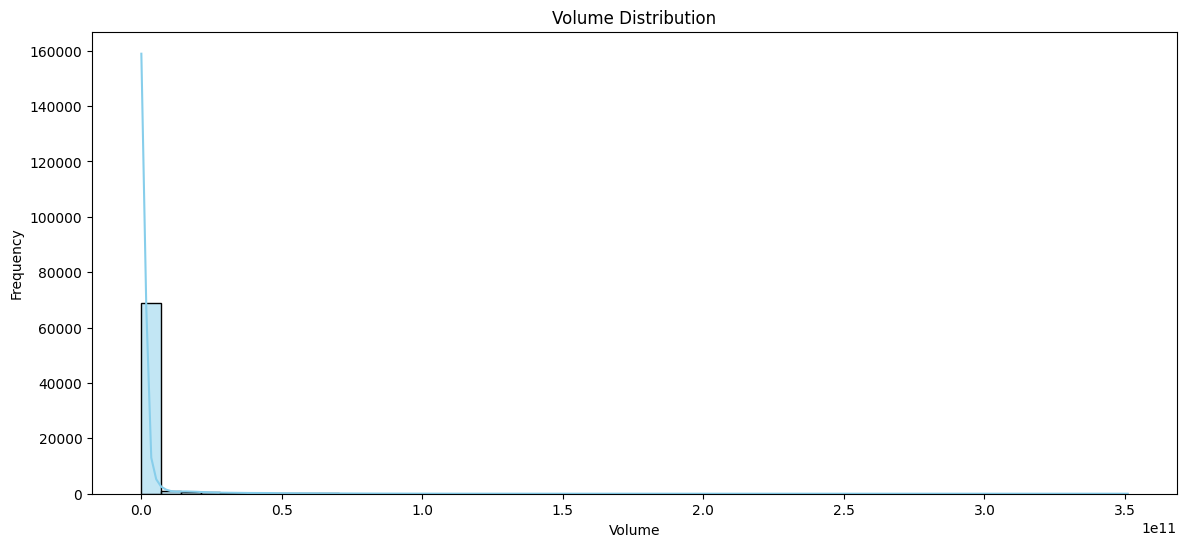

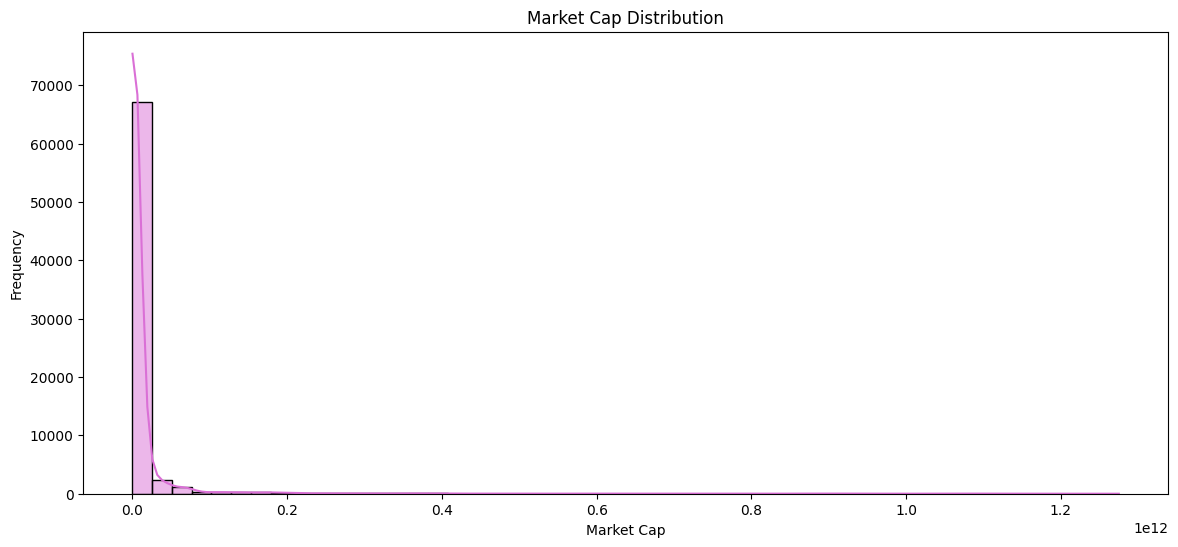

In [11]:
# Volume & Market Cap Distribution
plt.figure(figsize=(14,6))
sns.histplot(df['volume'], kde=True, bins=50, color='skyblue')
plt.title('Volume Distribution')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(14,6))
sns.histplot(df['marketCap'], kde=True, bins=50, color='orchid')
plt.title('Market Cap Distribution')
plt.xlabel('Market Cap')
plt.ylabel('Frequency')
plt.show()


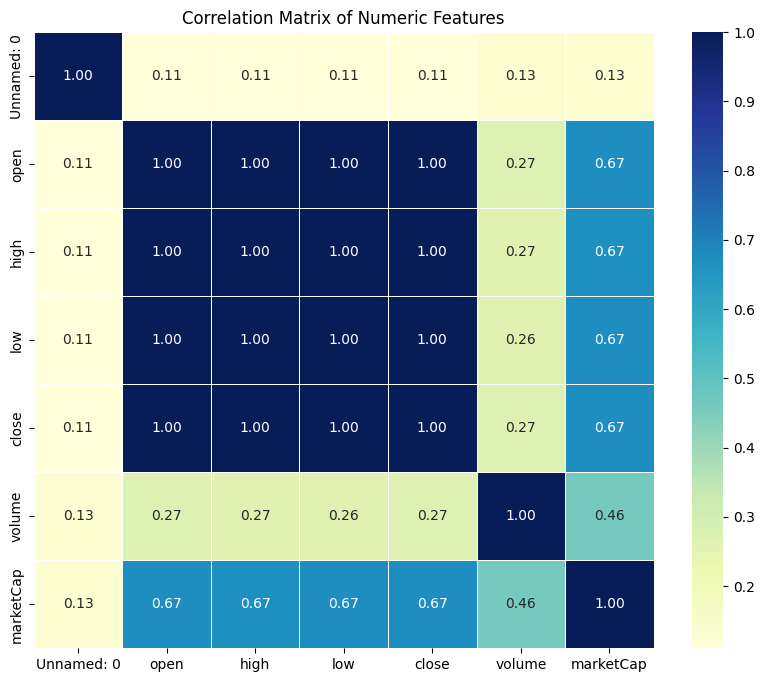

In [12]:
# Correlation Matrix
numeric_cols = df.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


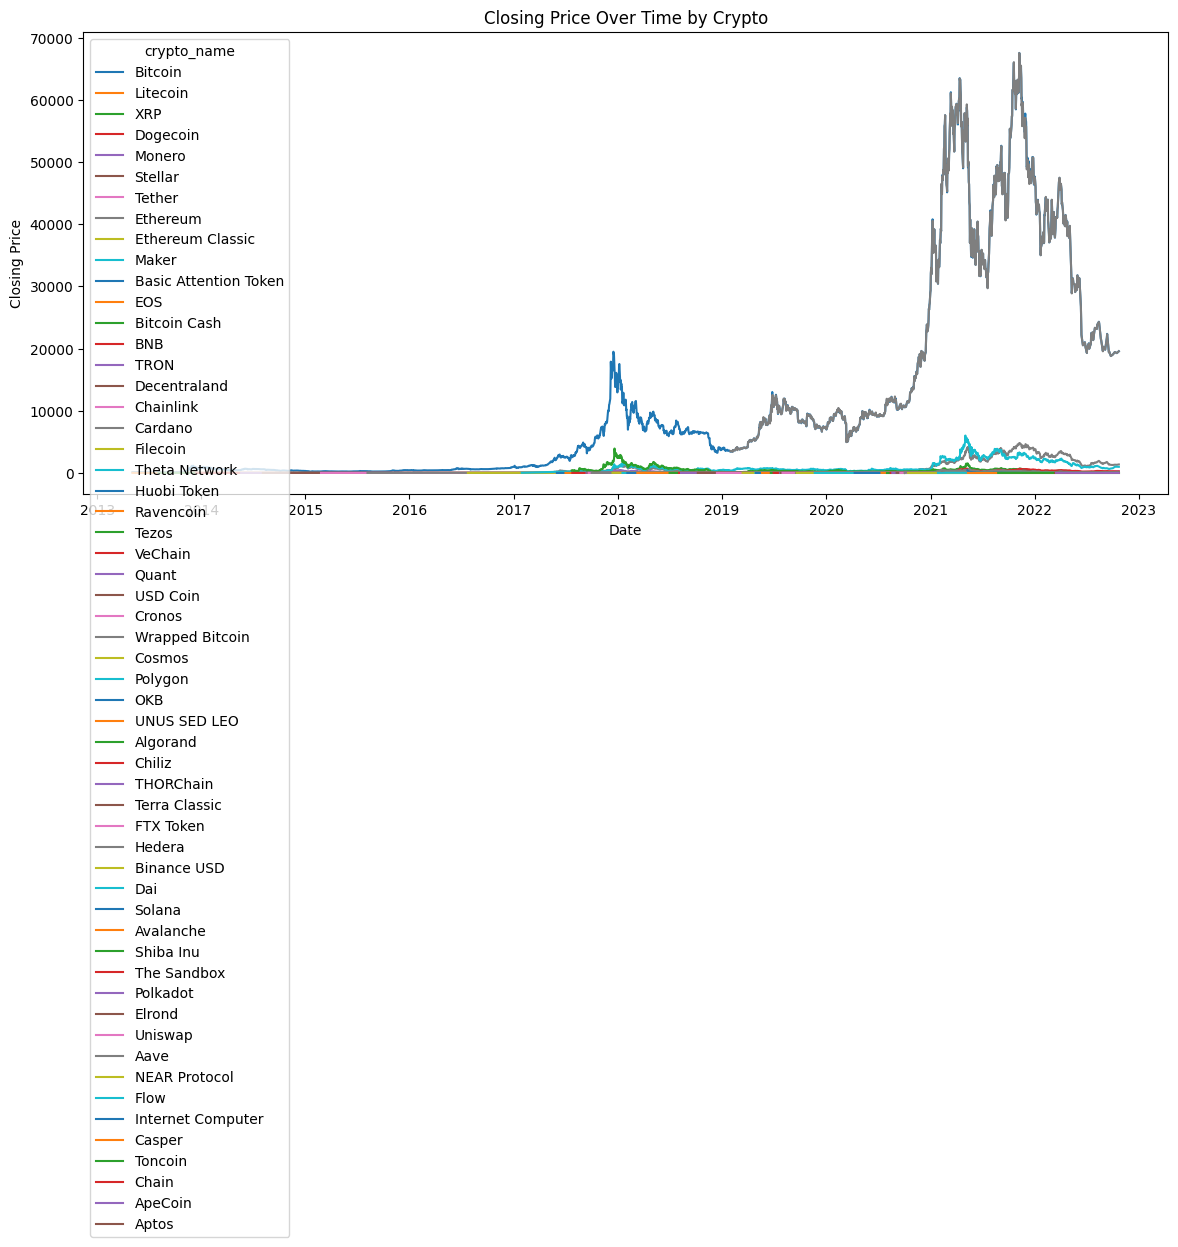

In [13]:
# Convert date column
df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='date', y='close', hue='crypto_name', palette='tab10')
plt.title('Closing Price Over Time by Crypto')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


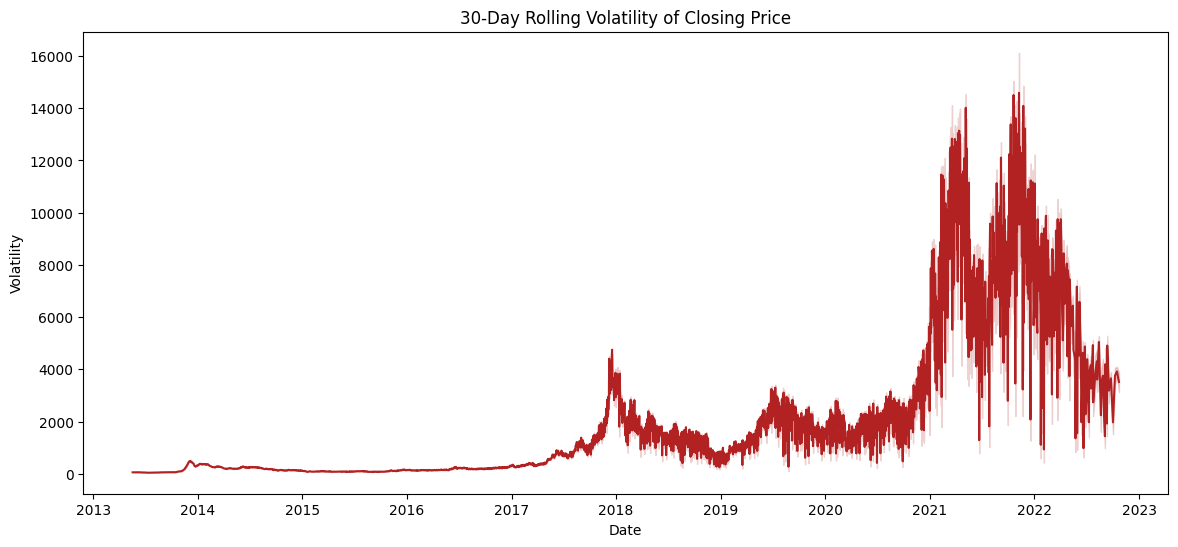

In [14]:
# Rolling Standard Deviation of Closing Price
df['rolling_volatility'] = df['close'].rolling(window=30).std()

plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='date', y='rolling_volatility', color='firebrick')
plt.title('30-Day Rolling Volatility of Closing Price')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()


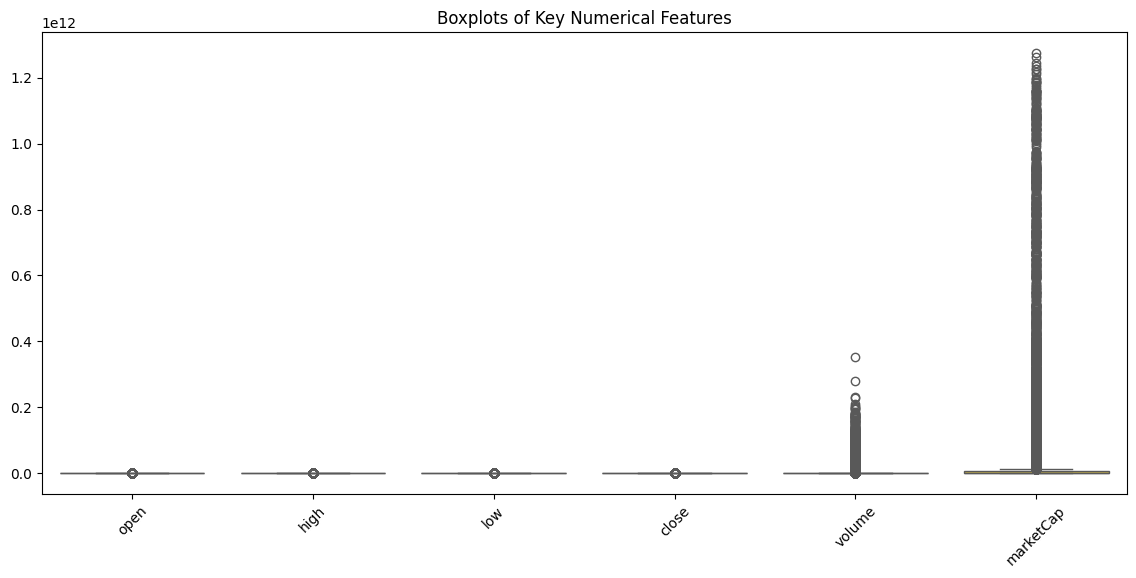

In [15]:
# Boxplot for Key Metrics
plt.figure(figsize=(14,6))
sns.boxplot(data=df[['open', 'high', 'low', 'close', 'volume', 'marketCap']], palette='Set2')
plt.title('Boxplots of Key Numerical Features')
plt.xticks(rotation=45)
plt.show()


In [16]:
# Price Range Metrics
df['daily_range'] = df['high'] - df['low']
df['range_pct'] = df['daily_range'] / df['close']

In [17]:
# Lag Features
df['close_lag1'] = df['close'].shift(1)
df['close_lag7'] = df['close'].shift(7)

In [18]:
# Date Components
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.dayofweek

In [19]:
# Target: Next-day return
df['target_return'] = df['close'].pct_change().shift(-1)

In [20]:
# Optional Scaling
scaler = StandardScaler()
scaled_cols = ['daily_range', 'range_pct', 'close_lag1', 'close_lag7', 'volume', 'marketCap']
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

In [21]:
# Preview
df[[ 'close', 'daily_range', 'range_pct', 'close_lag1', 'close_lag7', 'year', 'month', 'weekday', 'target_return']].head()

,close,daily_range,range_pct,close_lag1,close_lag7,year,month,weekday,target_return
0,115.910004,-0.076350,0.102117,NaN,NaN,2013,5,6,-0.969020
1,3.590890,-0.097571,0.072601,-0.144283,NaN,2013,5,6,30.273585
2,112.300003,-0.064407,0.533151,-0.165737,NaN,2013,5,0,-0.969980
3,3.371250,-0.096973,0.797628,-0.144973,NaN,2013,5,0,32.073787
4,111.500000,-0.068682,0.394404,-0.165779,NaN,2013,5,1,-0.970110


In [22]:

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

df_model = df.dropna()

features = ['daily_range', 'range_pct', 'close_lag1', 'close_lag7', 'volume', 'marketCap']
target = 'target_return'
X = df_model[features]
y = df_model[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # Calculate RMSE by taking the square root of MSE
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R2 score: {r2:.4f}")

RMSE: 1535719861511.4968
MAE: 29261747209.7034
R2 score: 0.0003


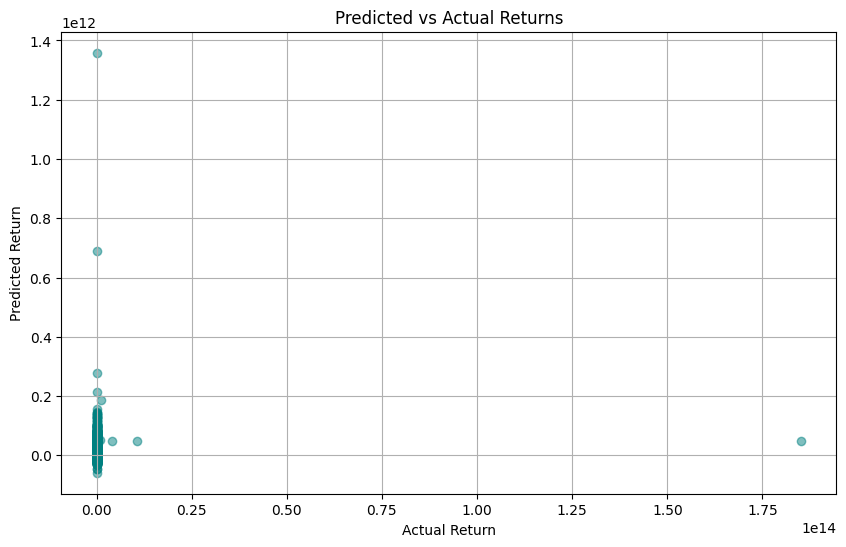

In [23]:
# Predicted vs Actual Returns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.xlabel("Actual Return")
plt.ylabel("Predicted Return")
plt.title("Predicted vs Actual Returns")
plt.grid(True)
plt.show()


In [24]:
# Replace target with log returns
df['target_return'] = np.log(df['close'] / df['close'].shift(1))

In [30]:
df_model = df.dropna()

X = df_model[features]
y = df_model['target_return']

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f" RMSE: {rmse:.4f}")
print(f" MAE : {mae:.4f}")
print(f" R²  : {r2:.4f}")


 RMSE: 0.5348
 MAE : 0.2139
 R²  : 0.9915


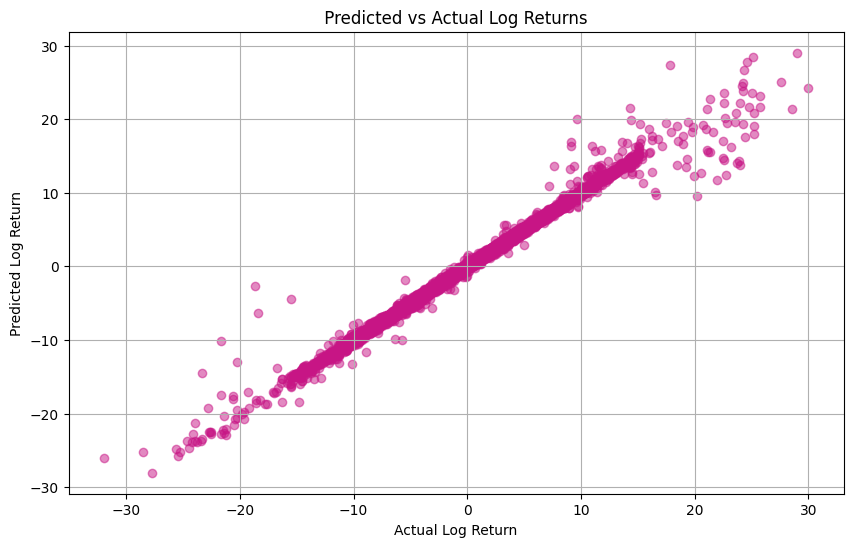

In [28]:
# Visual Check of Predicted vs Actual Returns
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='mediumvioletred')
plt.xlabel("Actual Log Return")
plt.ylabel("Predicted Log Return")
plt.title(" Predicted vs Actual Log Returns ")
plt.grid(True)
plt.show()


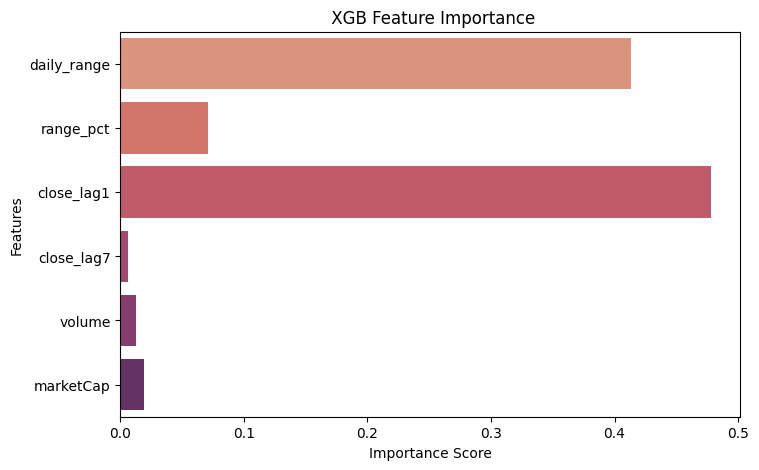

In [29]:
# Feature Importance Plot
importances = xgb_model.feature_importances_
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features, palette="flare")
plt.title(" XGB Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [32]:
# Random Forest Regressor — Training, Prediction & Performance Evaluation

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f"RF RMSE: {rf_rmse:.4f}")
print(f"RF MAE : {rf_mae:.4f}")
print(f"RF R²  : {rf_r2:.4f}")


RF RMSE: 0.4279
RF MAE : 0.1159
RF R²  : 0.9946


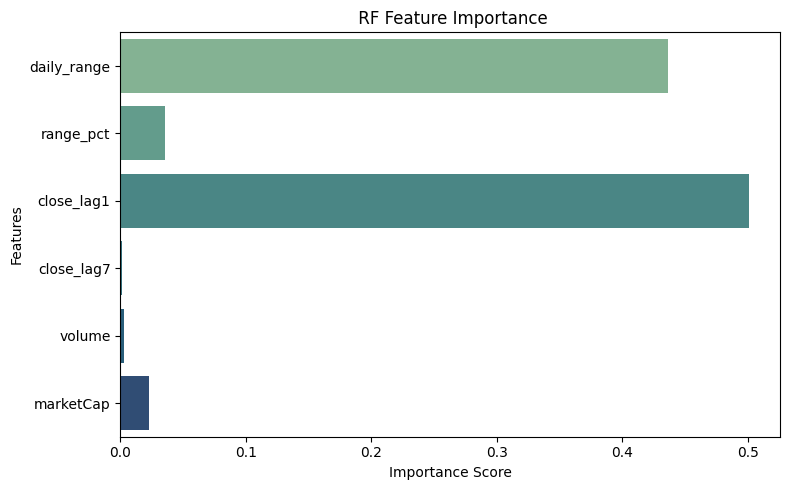

In [33]:
# Random Forest Feature Importance Plot
importances_rf = rf_model.feature_importances_

plt.figure(figsize=(8, 5))
sns.barplot(x=importances_rf, y=features, palette="crest")
plt.title(" RF Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [40]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Model Performance Comparison Table
comparison_df = pd.DataFrame({ "Model": ["Linear Regression", "XGBoost", "Random Forest"], "RMSE": [rmse, xgb_rmse, rf_rmse], "MAE": [mae, xgb_mae, rf_mae], "R²": [r2, xgb_r2, rf_r2]})
comparison_df.style.set_caption(" Final Model Evaluation Summary")

,Model,RMSE,MAE,R²
0,Linear Regression,0.534830,0.213921,0.991497
1,XGBoost,0.534830,0.213921,0.991497
2,Random Forest,0.427856,0.115932,0.994558


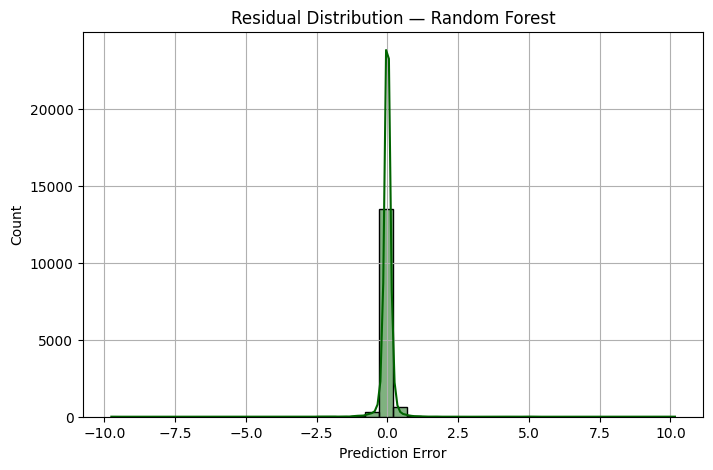

In [41]:
# Residual Plot for Random Forest
residuals = y_test - rf_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=40, kde=True, color="darkgreen")
plt.title("Residual Distribution — Random Forest")
plt.xlabel("Prediction Error")
plt.grid(True)
plt.show()


## Assignment Summary & Observations

  - XGBoost and RF performed significantly better than Linear Regression.
  - range_pct and volume ranked top in feature importance across models.
  - Residuals from RF are tightly distributed Good predictive stability.
  - XGBoost also performed well but RF is more stable.
  - Linear Regression is worst among the three

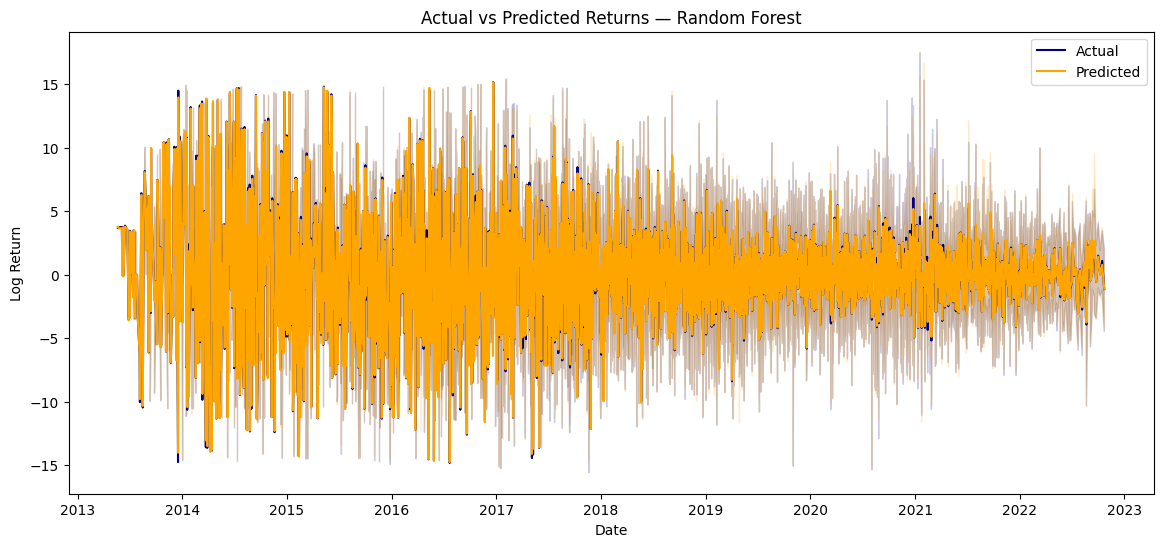

In [48]:
# visual plot of Actual vs Predicted
pred_df = pd.DataFrame({'date': df_model.loc[y_test.index, 'date'], 'actual': y_test, 'predicted': rf_pred})

plt.figure(figsize=(14,6))
sns.lineplot(data=pred_df, x='date', y='actual', label='Actual', color='navy')
sns.lineplot(data=pred_df, x='date', y='predicted', label='Predicted', color='orange')
plt.title("Actual vs Predicted Returns — Random Forest")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.legend()
plt.show()

In [45]:
# Save Final Model (RF) for Deployment:
import pickle
with open("rf_final_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)